### Flask介绍（轻量级的框架，非常快速的就能把程序搭建起来）
Flask是一个基于Python开发并且依赖jinja2模板和Werkzeug WSGI服务的一个微型框架，对于Werkzeug本质是Socket服务端，其用于接收http请求并对请求进行预处理，然后触发Flask框架，开发人员基于Flask框架提供的功能对请求进行相应的处理，并返回给用户，如果要返回给用户复杂的内容时，需要借助jinja2模板来实现对模板的处理，即：将模板和数据进行渲染，将渲染后的字符串返回给用户浏览器。

“微”(micro) 并不表示你需要把整个 Web 应用塞进单个 Python 文件（虽然确实可以 ），也不意味着 Flask 在功能上有所欠缺。微框架中的“微”意味着 Flask 旨在保持核心简单而易于扩展。Flask 不会替你做出太多决策——比如使用何种数据库。而那些 Flask 所选择的——比如使用何种模板引擎——则很容易替换。除此之外的一切都由可由你掌握。如此，Flask 可以与您珠联璧合。

默认情况下，Flask 不包含数据库抽象层、表单验证，或是其它任何已有多种库可以胜任的功能。然而，Flask 支持用扩展来给应用添加这些功能，如同是 Flask 本身实现的一样。众多的扩展提供了数据库集成、表单验证、上传处理、各种各样的开放认证技术等功能。Flask 也许是“微小”的，但它已准备好在需求繁杂的生产环境中投入使用。


优点：
- 有非常齐全的官方文档，上手非常方便

- 有非常好的拓展机制和第三方的拓展环境，工作中常见的软件都有对应的拓展，自己动手实现拓展也很容易

- 微型框架的形式给了开发者更大的选择空间

### 安装
虚拟环境搭建
`virtualenv --no-site-packages falskenv`
  
激活windows下虚拟环境
```
cd Scripts
activate
```
执行
`pip install flask`

### 快速入门
```
import flask # 导入flask

app = flask.Flask(__name__) # 实例化

@app.route('/')# 装饰器实现路由
def helo():
    return '你好，我是Flask!'

if __name__ == '__main__':
    app.run()
```
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   WARNING: Do not use the development server in a production environment.
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)



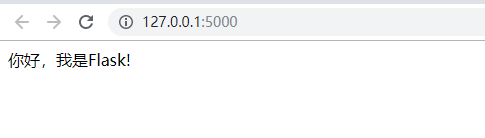

### url参数快递
```
import flask

app = flask.Flask(__name__)

@app.route('/')
@app.route('/hello') # 实现url地址
def helo():
    return '你好，我是Flask!'

if __name__ == '__main__':
    app.run()
```
一个函数可以有多个url的装饰器来修饰

### 
```
import flask

html_txt = """
<!DOCTYPE html>
<html>
    <body>
        <h2>收到GET请求</h2>
        <form method='post'>
        <input type='submit' value='发送POST请求' />
        </form>
    </body>
</html>
"""

app = flask.Flask(__name__)

@app.route('/hello',methods=['GET','POST'])
def helo():
    if flask.request.method == 'GET':
        return html_txt
    else:
        return '收到POST请求，我是Flask!'

if __name__ == '__main__':
    app.run()
``` 

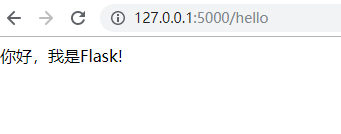


### 两种请求映射同一函数
```
import flask

html_txt = """
<!DOCTYPE html>
<html>
    <body>
        <h2>收到GET请求</h2>
        <form method='post'>
        <input type='submit' value='发送POST请求' />
        </form>
    </body>
</html>
"""

app = flask.Flask(__name__)

@app.route('/hello',methods=['GET','POST'])
def helo():
    if flask.request.method == 'GET':
        return html_txt
    else:
        return '收到POST请求，我是Flask!'

if __name__ == '__main__':
    app.run()
``` 

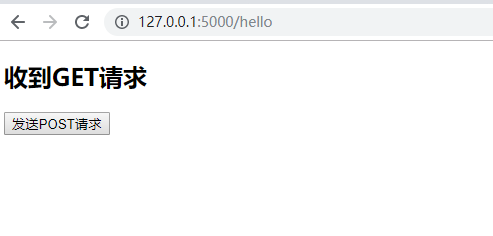

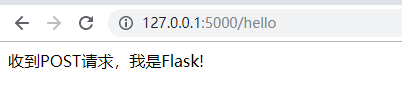

### 请求url传递的参数

```
import flask

app = flask.Flask(__name__)

@app.route('/hello/<name>')
def helo(name):
    return "你好," + name + '!'

if __name__ == '__main__':
    app.run()
```

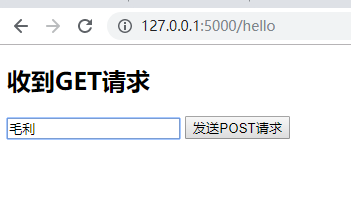



- 获取get请求参数的基本方式调用`flask.request.args`的get方法
- 获得post请求使用flask.


```
import flask

html_txt = """
<!DOCTYPE html>
<html>
    <body>
        <h2>收到GET请求</h2>
        <form method='post'>
        <input type='text' name='name' placeholder='请输入你的姓名' />
        <input type='submit' value='发送POST请求' />
        </form>
    </body>
</html>
"""

app = flask.Flask(__name__)

@app.route('/hello',methods=['GET','POST'])
def helo():
    if flask.request.method == 'GET':
        return html_txt
    else:
        name = 'name' in flask.request.form and flask.request.form['name']
        if name:
            return '你是：' + name + '!'
        else:
            return '你没有输入姓名！'

if __name__ == '__main__':
    app.run(debug=True)
    
```

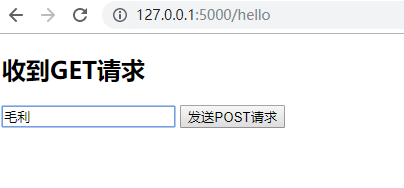

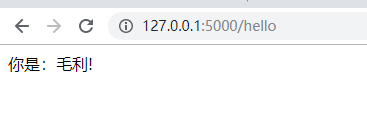

### 使用cookie和session
使用cookie
```
import flask

html_txt = """
<!DOCTYPE html>
<html>
    <body>
        <h2>收到GET请求</h2>
        <a href='/get_info'>获取cookie信息</a>
    </body>
</html>
"""

app = flask.Flask(__name__)

@app.route('/set_info/<name>')
def set_cks(name):
    name = name if name else 'anonymous'
    resp = flask.make_response(html_txt)
    resp.set_cookie('name',name)
    return resp

@app.route('/get_info')
def get_cks():
    name = flask.request.cookies.get('name')
    return '获取的cookie信息是:' + name

if __name__ == '__main__':
    app.run(debug=True)
```
使用session
```
import flask

html_txt = """
<!DOCTYPE html>
<html>
    <body>
        <h2>收到GET请求</h2>
        <a href='/get_info'>获取会话信息</a>
    </body>
</html>
"""

app = flask.Flask(__name__)

@app.route('/set_info/<name>')
def set_cks(name):
    name = name if name else 'anonymous'
    flask.session['name'] = name
    return html_txt

@app.route('/get_info')
def get_cks():
    name = 'name' in flask.session and flask.session['name']
    if name:
        return '获取的会话信息是:' + name
    else:
        return '没有相应会话信息。'

if __name__ == '__main__':
    app.secret_key = 'dfadff#$#5dgfddgssgfgsfgr4$T^%^'
    app.run(debug=True)
```    

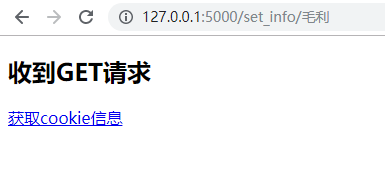

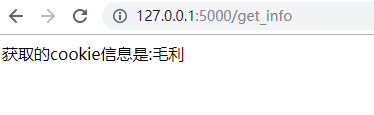

### 渲染模板
```
import flask

app = flask.Flask(__name__)

@app.route('/hello')
def helo():
    return flask.render_template('index.html')

if __name__ == '__main__':
    app.run(debug=True)
```
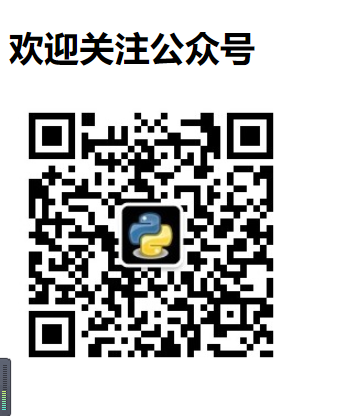

### 实战练习（实现文件上传）

```
import flask

app = flask.Flask(__name__)

@app.route('/upload',methods=['GET','POST'])
def upload():
    if flask.request.method == 'GET':
        return flask.render_template('upload.html')
    else:
        file = flask.request.files['file']
        if file:
            file.save(file.filename)
            return '上传成功！'

if __name__ == '__main__':
    app.run(debug=True)

```
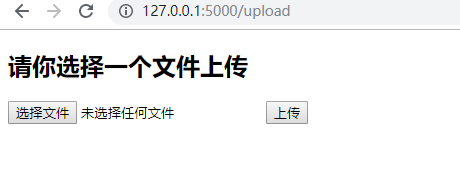

### 总结
- 对于小儿科的flask，不建议深入，太轻了，无法达到部署的条件，还是用django吧